<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [3]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl' -O 'DIP_HW3_data.zip'
!unzip DIP_HW3_data.zip

--2023-12-22 17:50:30--  https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl
Resolving drive.google.com (drive.google.com)... 172.253.63.102, 172.253.63.139, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/30a2bag509gslhthifeu1pi58gjpbq18/1703267400000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=df1d53bf-9b06-4a5b-ab94-61ac9ec0b843 [following]
--2023-12-22 17:50:30--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/30a2bag509gslhthifeu1pi58gjpbq18/1703267400000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=df1d53bf-9b06-4a5b-ab94-61ac9ec0b843
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 172.253.115.132, 2607

# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [4]:
import sys
import numpy as np
import random
import cv2 as cv
from mpl_toolkits import mplot3d
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, fftshift, ifft2

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###

# ENTER YOUR CODE HERE.

###

# Question 3: Image Restoration (35%)

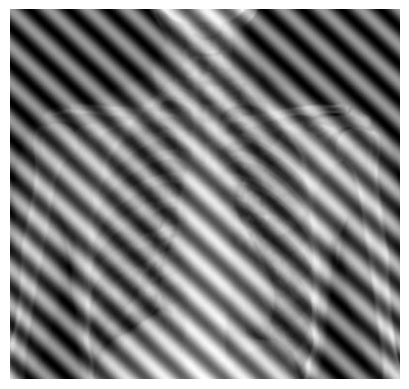

(380, 400)


In [57]:
img = cv.imread('chest_xray.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
print(img.shape)

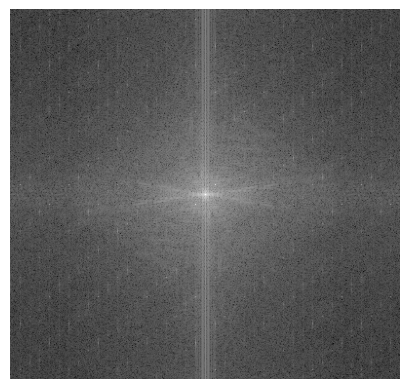

In [58]:
image_fourier = fftshift(fft2(img))
spectrum = np.log(1 + np.abs(image_fourier))

plt.imshow(spectrum, cmap='gray')
plt.axis('off')
plt.show()

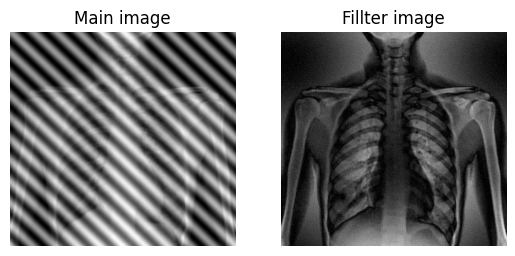

In [59]:
#@title Q3 - Part 3 (30%)

spikes = np.where(spectrum > np.max(spectrum) *  0.82)
# print(spikes)
image_fourier[spikes] = 0
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(image_fourier)))
# filtered_image = cv.boxFilter(spectrum, -1, (5,5))

fig, axs = plt.subplots(1, 2)
axs[0].set_title('Main image')
axs[1].set_title('Fillter image')
axs[0].imshow(img, cmap='gray')
axs[1].imshow(filtered_image, cmap='gray')

for ax in axs:
    ax.axis('off')
plt.show()

# plt.imshow(filtered_image, cmap='gray')
# plt.axis('off')
# plt.show()


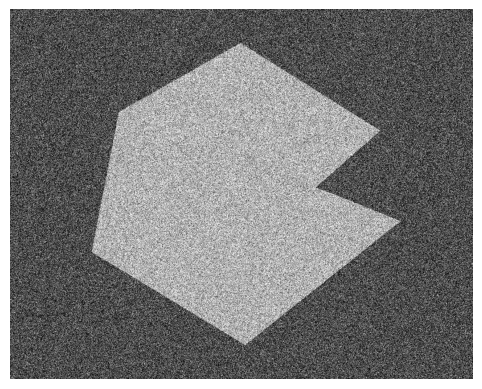

(650, 813)


In [60]:
#@title Q3 - Part 4 (5%)
img2 = cv.imread('noisy.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()
print(img2.shape)

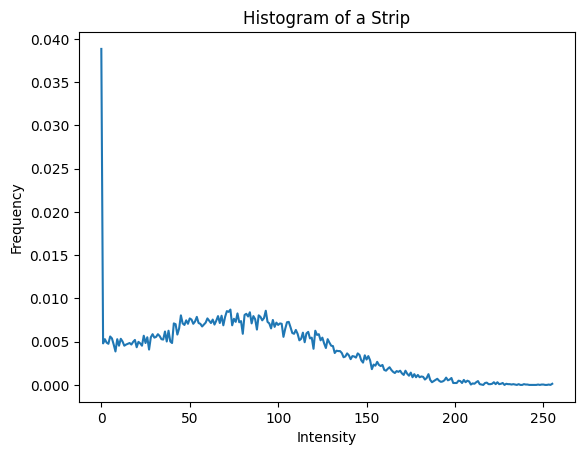

In [61]:
strip = img2[0:150, 0:150]
# print(strip)
histogram_imag2, bins = np.histogram(strip.flatten(),256,[0, 256])
histogram_imag2 = histogram_imag2 / np.sum(histogram_imag2)
# plt.imshow(strip, cmap='gray')
# plt.axis('off')
# plt.show()
plt.plot(histogram_imag2)
plt.title('Histogram of a Strip')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

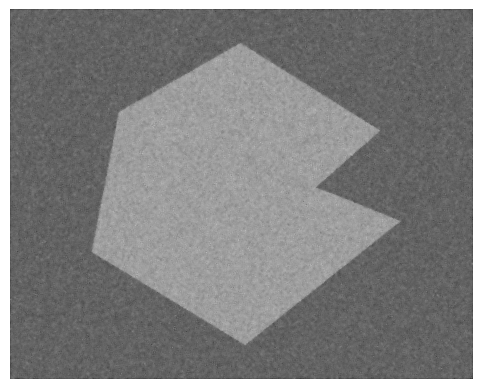

In [67]:
#@title Q3 - Part 6 (15%)

image_filter = np.float32(np.copy(img2))
pad_size = 5 // 2
padding_of_image = cv.copyMakeBorder(img2, pad_size, pad_size, pad_size, pad_size, cv.BORDER_CONSTANT, value=0)
hist_mean = np.sum(np.arange(256) * histogram_imag2)
noise_variance = np.sum((np.arange(256) - hist_mean) ** 2 * histogram_imag2)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        w = padding_of_image[i:i+5, j:j+5]
        w_mean = np.sum(w) / (5 ** 2)
        w_var = np.sum((w - w_mean) ** 2) / (5 ** 2)
        image_filter[i, j] = image_filter [i, j] - (noise_variance / w_var) * (image_filter [i, j] - w_mean)
plt.imshow(image_filter , cmap='gray')
plt.axis('off')
plt.show()

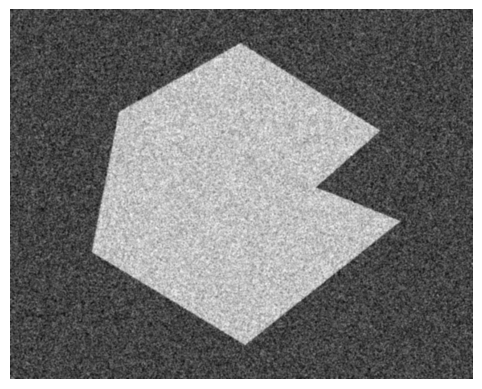

In [68]:
#@title Q3 - Part 7 (10%)
avg_of_image = cv.GaussianBlur(img2, (5, 5), 0)
plt.imshow(avg_of_image, cmap='gray')
plt.axis('off')
plt.show()

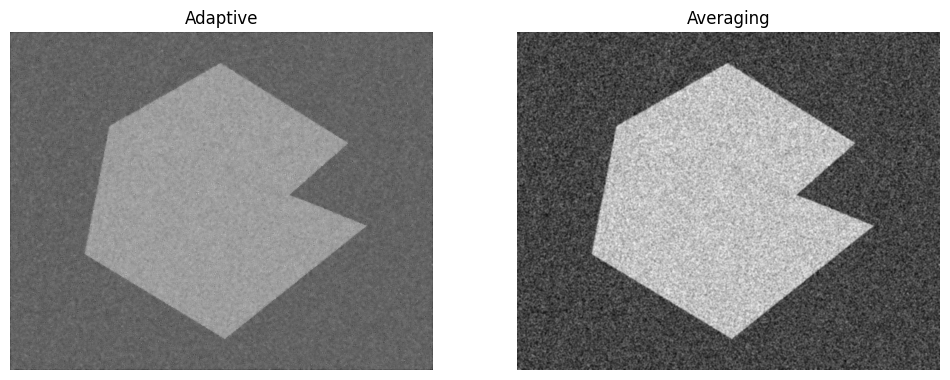

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(image_filter, cmap='gray')
axs[0].set_title('Adaptive')
axs[1].imshow(avg_of_image, cmap='gray')
axs[1].set_title('Averaging')
for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl><font color='green' size="5">جواب سوال ۳-۸</font>
<div>

<div dir=rtl><font size="4">
فیلتر Adaptive بهتر عمل کرده است و دقت بالاتری برای حذف نویز داشته است اما تصویر کمی کم رنگ تر از تصویر اصلی شده است همچنین یکی دیگر از تفاوت این دو فیلتر این است که فیلتر میانگین گیری محاسبات کم و سرعت بالاتری نسبت به Adaptive دارد.

 </font><br />
</div>

# Question 4: Morphology (35%)

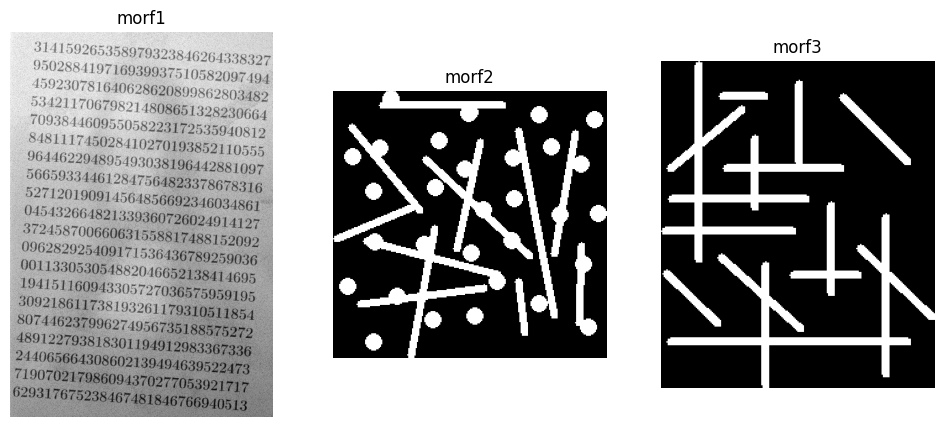

In [70]:
#@title Q4 - Part 1 (5%)
morf1 = cv.imread('morf1.png', cv.IMREAD_GRAYSCALE)
morf2 = cv.imread('morf2.png', cv.IMREAD_GRAYSCALE)
morf3 = cv.imread('morf3.png', cv.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].imshow(morf1, cmap='gray')
axs[0].set_title('morf1')
axs[1].imshow(morf2, cmap='gray')
axs[1].set_title('morf2')
axs[2].imshow(morf3, cmap='gray')
axs[2].set_title('morf3')
for ax in axs:
    ax.axis('off')
plt.show()

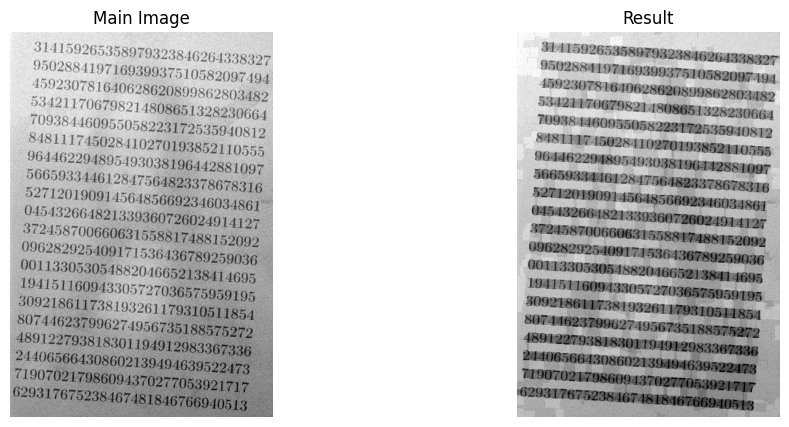

In [71]:
#@title Q4 - Part 2 (35%)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (15, 15))
tophat = cv.morphologyEx(morf1, cv.MORPH_TOPHAT, kernel)
bottomhat = cv.morphologyEx(morf1, cv.MORPH_BLACKHAT, kernel)
back_ground = cv.add(tophat, bottomhat)
result = cv.subtract(morf1, back_ground)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(morf1, cmap='gray')
axs[0].set_title('Main Image')
axs[1].imshow(result, cmap='gray')
axs[1].set_title('Result')
for ax in axs:
    ax.axis('off')
plt.show()

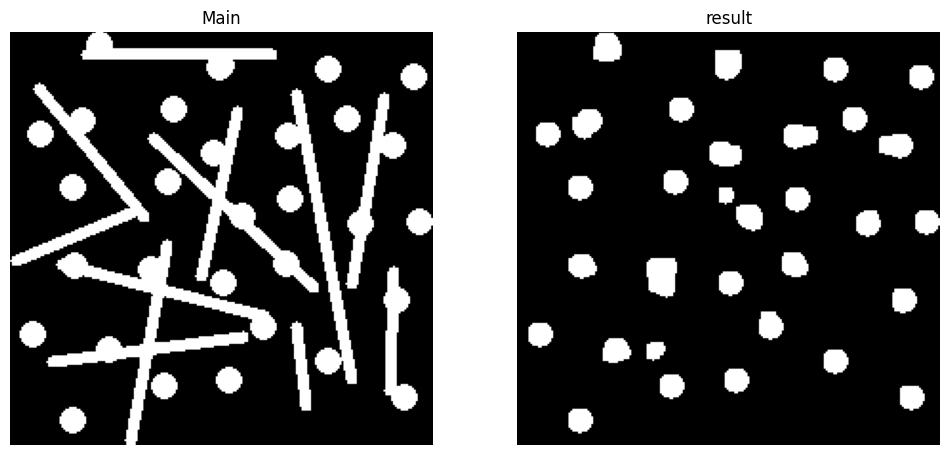

In [72]:
#@title Q4 - Part 3 (20%)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (8, 8))
result = cv.morphologyEx(morf2, cv.MORPH_OPEN, kernel)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(morf2, cmap='gray')
axs[0].set_title('Main')
axs[1].imshow(result, cmap='gray')
axs[1].set_title('result')
for ax in axs:
    ax.axis('off')
plt.show()

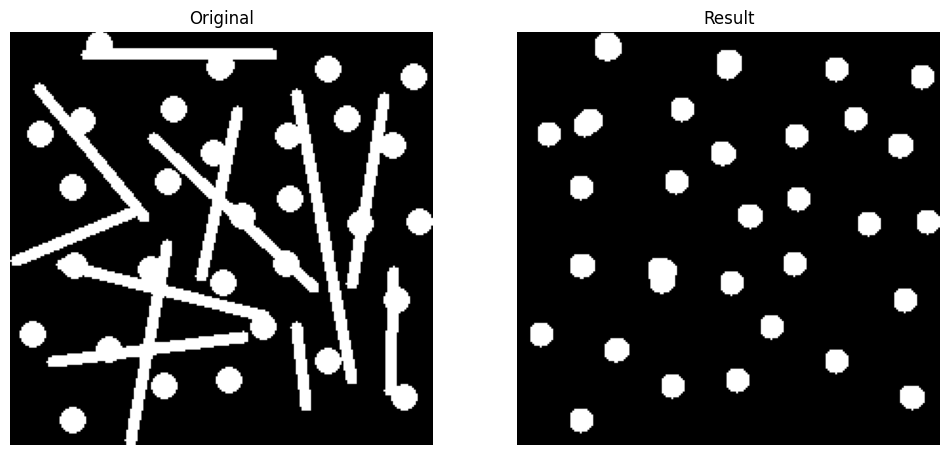

In [73]:
#@title Q4 - Part 4 (10%)
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (12, 12))
result2 = cv.morphologyEx(morf2, cv.MORPH_OPEN, kernel2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(morf2, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(result2, cmap='gray')
axs[1].set_title('Result')
for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۴-۴</font>
<div>

<div dir=rtl><font size="4">
می توانیم با تغییر سایز کرنل (افزایش آن) این مشکل را برطرف کنیم زیرا میتوانیم پیکسل های بیشتری را در یک عملیات داشته باشیم و بتونیم نقاط های بیشتری رو بررسی کنیم وآن ها را از یکدیگر تمایز دهیم.

 </font><br />
</div>

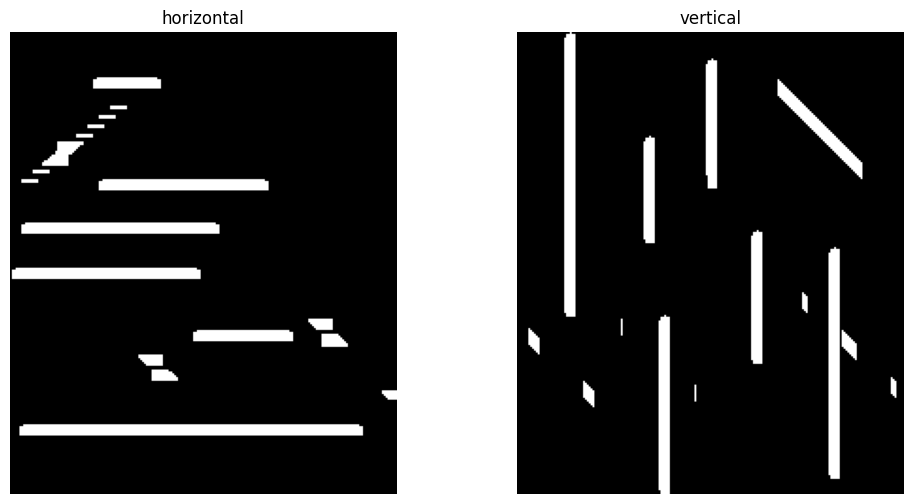

In [76]:
#@title Q4 - Part 5 (20%)
kernel_of_horizontal = cv.getStructuringElement(cv.MORPH_RECT, (9, 2))
horizontal = cv.morphologyEx(morf3, cv.MORPH_OPEN, kernel_of_horizontal)

kernel_of_vertical = cv.getStructuringElement(cv.MORPH_RECT, (1, 9))
vertical_lines = cv.morphologyEx(morf3, cv.MORPH_OPEN, kernel_of_vertical)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(horizontal, cmap='gray')
axs[0].set_title('horizontal')
axs[1].imshow(vertical_lines, cmap='gray')
axs[1].set_title('vertical')
for ax in axs:
    ax.axis('off')
plt.show()

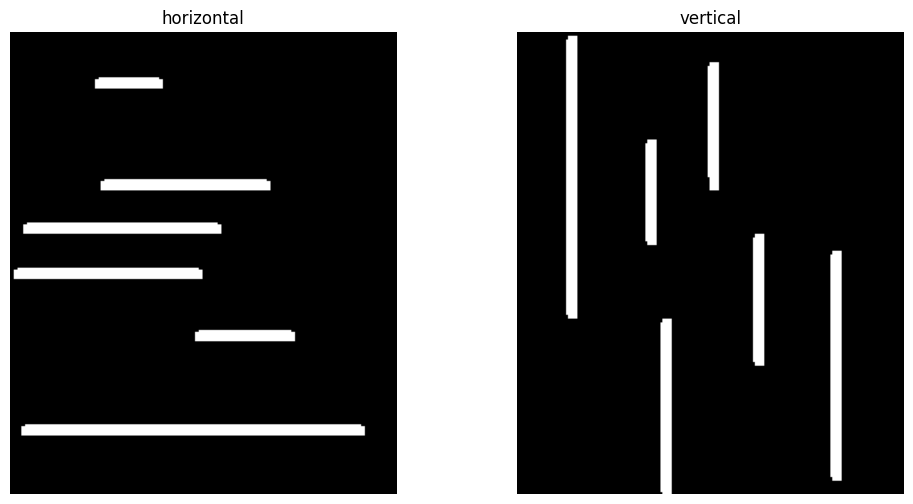

In [77]:
#@title Q4 - Part 6 (10%)
kernel_of_horizontal = cv.getStructuringElement(cv.MORPH_RECT, (20, 2))
horizontal = cv.morphologyEx(morf3, cv.MORPH_OPEN, kernel_of_horizontal)

kernel_of_vertical = cv.getStructuringElement(cv.MORPH_RECT, (2, 20))
vertical_lines = cv.morphologyEx(morf3, cv.MORPH_OPEN, kernel_of_vertical)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(horizontal, cmap='gray')
axs[0].set_title('horizontal')
axs[1].imshow(vertical_lines, cmap='gray')
axs[1].set_title('vertical')
for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۴-۶</font>
<div>
<font size="4">
مانند قسمت قبل،میتوانیم با تغییر سایز کرنل،این مشکل را برطرف کنیم زیرا میتوانیم پیکسل های بیشتری را در یک عملیات داشته باشیم و بتونیم نقاط های بیشتری رو بررسی کنیم وآن ها را از یکدیگر تمایز دهیم.
 </font><br />
</div>

<div dir=rtl>
<font color='yellow' size = "7">	ملاحظات
</font>

</div>
<div dir=rtl>
<font size = "4">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)
</font>
</div>

<div dir=rtl>
<font size = "4">	**	لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font>
</div>

<div dir=rtl>
<font size = "4"> **	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW0_Num باشند که Num شماره دانشجویی شما است مانند HW0_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font>
</div>